# Titanic: Machine Learning from Disaster

## 1. Definição do Problema de Negócio

O RMS Titanic foi um luxuoso navio de passageiros britânico, na qual sua construção começou no ano de 1909 e foi concluída em 1911, sendo estimada em 7,5 milhões de dólares. O navio tinha 269 metros de comprimento, 28 metros de largura e 53 metros de altura. Operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros, distribuídos em três classes.

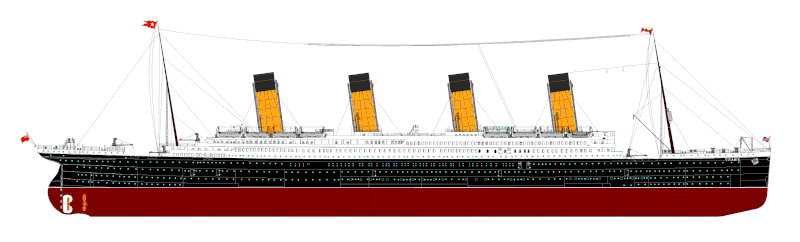

O návio foi projetado para ser o mais luxuoso e seguro da sua época, recebendo inclusive a fama de ser "inafundável". Porém, no ano de 1912, colidiu com um iceberg e, posteriormente, acabou nafragando. Seu naufrágio teve causas naturais e humanas, sendo que matou 1502 pessoas de um total de 2224 passageiros.

Um dos motivos pelos quais o naufrágio causou muitas perdas de vida, foi a falta de botes salva-vidas suficientes para os passageiros e tripulantes. Embora a sorte estivesse envolvida na sobrevivência das pessoas, alguns grupos de tinham mais probabilidade de serem salvos do que outras, como mulheres, crianças e primeira classe do navio. 

### Objetivo

Primeiramente será feita uma análise de quais variáveis tiveram uma maior influência na sobrevivência das pessoas.

Após a análise dos dados, será proposto um modelo, na qual será responsável por fazer uma previsão de sobrevivência para um passageiro qualquer.

## 2. Obtenção dos Dados

Os dados estão disponibilizados na plataforma do kaggle https://www.kaggle.com/c/titanic/data e estão divididos em dois grupos.

- Dataset de treino (train.csv) : Usado para a construção do modelo de Machine Learning. Neste conjunto de dados, é informado se o passageiro sobreviveu ou não

- Dataset de teste (test.csv) : Usado como dados que o modelo não conhece. Não é informado se o passageiro sobreviveu ou não.

In [1]:
# Importando os módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Importando os dados
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## 3. Análise Exploratória dos Dados

### Identificando cada variável

- PassengerId: Número de identificação do passageiro
- Survived: Informa se o passageiro sobreviveu ao desastre
        0 = Não
        1 = Sim
- Pclass: Classe do bilhete
        1 = 1ª Classe
        2 = 2ª Classe
        3 = 3ª Classe
- Name: Nome do passageiro
- Sex: Sexo do passageiro
- Age: Idade do passageiro
- SibSp: Quantidade de cônjuges e irmãos a bordo
- Parch: Quantidade de pais e filhos a bordo
- Ticket: Número da passagem
- Fare: Preço da Passagem
- Cabin: Número da cabine do passageiro
- Embarked: Porto no qual o passageiro embarcou
        C = Cherbourg
        Q = Queenstown
        S = Southampton

In [3]:
# Número de registros (linhas) e features (colunas) 
print('Registros: {}\nFeatures: {}'.format(train.shape[0], train.shape[1]))

Registros: 891
Features: 12


In [4]:
# Nome das features
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Tipo das features
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Tipos de cada variável

- Categóricas
        Pclass
        Name
        Survived
        Sex
        Embarked
        Ticket
        Passengerld
        Cabin
- Numéricas
        - Discretas
            SibSp
            Parch
        - Contínuas
            Age
            Fare            

A variável 'class' é também a nossa variável target, uma vez que queremos prever a probabilidade de um passageiro sobreviver ou não.

In [6]:
# Primeiras colunas do dataset de treino
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dados missing

In [7]:
# Informações sobre os dados
train.info()
print('-' * 50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [8]:
# Porcentagem de dados de treino faltantes
((train.isnull().sum() / train.shape[0]) * 100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

A variável Cabin possui o maior número de dados missing, 77%. Na sequência, a coluna Age possui quase 20% de dados missing, seguida pela coluna Embarked, que possui menos de 1%.

In [9]:
# Porcentagem de dados de teste faltantes
((test.isnull().sum() / test.shape[0]) * 100).sort_values(ascending = False)

Cabin          78.229665
Age            20.574163
Fare            0.239234
Embarked        0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
PassengerId     0.000000
dtype: float64

Novamente a variável Cabin lidera, com 78%. Seguida pela variável Age (20%) e pela variável Fare, com menos de 1%.

### Distribuição Estatística dos Dados

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

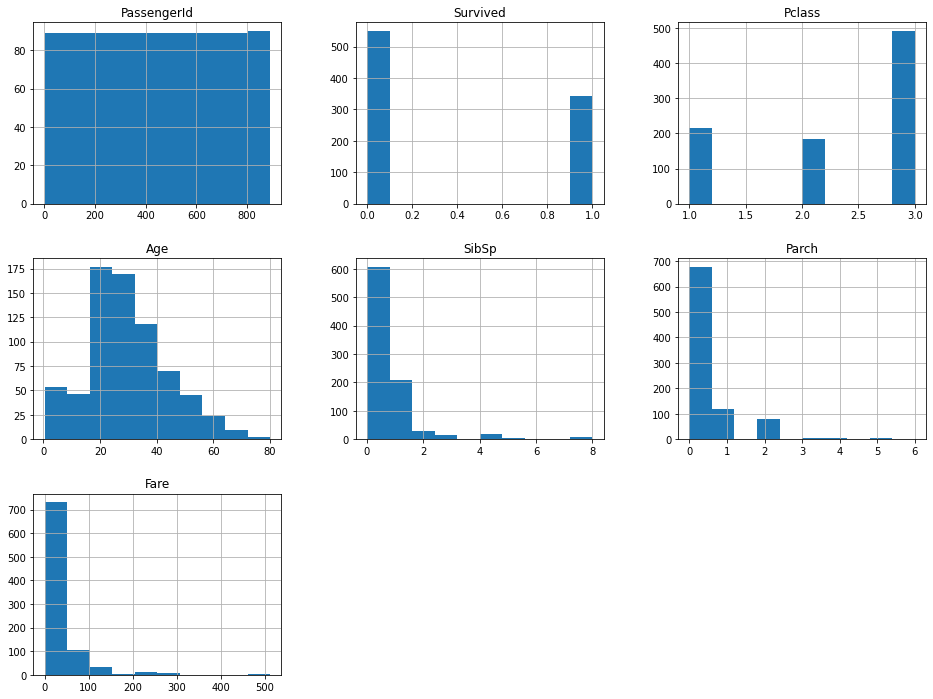

In [11]:
# Histograma das variáveis numéricas
train.hist(figsize = (16,12))

### Grupos de pessoas com mais chances de sobreviver

In [12]:
# Probabilidade de sobrevivência pelo sexo do passageiro
train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [13]:
# Probabilidade de sobreviência pela classe do passageiro
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [14]:
# Probabilidade de sobrevivência pelo porto de embarque do passageiro
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

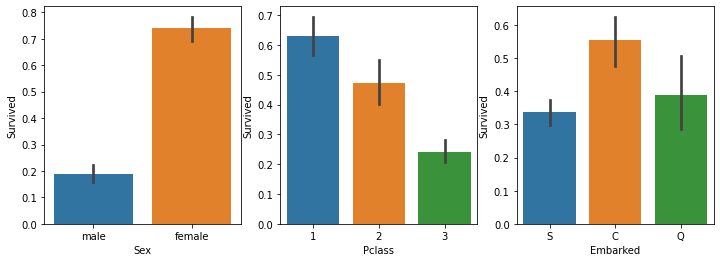

In [15]:
# Plotar os gráficos para Survived x Sex, Pclass e Embarked

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4))
sns.barplot(x = 'Sex', y = 'Survived', data = train, ax = ax1)
sns.barplot(x = 'Pclass', y = 'Survived', data = train, ax = ax2)
sns.barplot(x = 'Embarked', y = 'Survived', data = train, ax = ax3)

Através do gráfico acima conseguimos extrair duas suposições. A primeira é de que o sexo feminino possui muito mais chances de sobrevivência do que em relação ao sexo masculino (75% x 18%). A segunda conclusão refere-se a variável Pclass, na qual os passageiros da primeira classe são os que possuem mais chance de sobrevivência, seguidos pelos da segunda classe e, por fim, os passageiros da terceira classe.

In [16]:
# Probabilidade de sobrevivência do passageiro pela quantidade de cônjugues e irmãos 
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [17]:
# Probabilidade de sobrevivência pela quantidade de pais e filhos
train[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


Analisando a probabilidade de sobrevivência pelas variáveis SibSp e Parch, notamos que tais fatores, a princípio, não possuem uma contribuição significativa na sobrevivência dos passageiros.

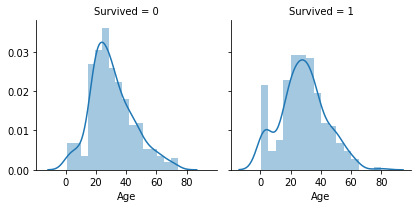

In [18]:
# Influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col = 'Survived')
age_survived.map(sns.distplot, 'Age')

Analisando a distribuição da idade dos sobreviventes, percebe-se que o comportamento dos gráficos são parecidos. Porém, no gráfico dos sobrevivente, nota-se um leve pico para as crianças pequenas. Esse detalhe confirma a hipótese de que mulheres e crianças possuem maior chance de sobrevivência.

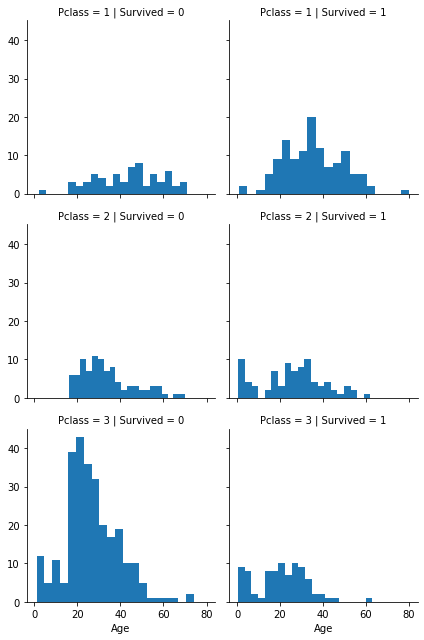

In [19]:
# Combinando as variáveis Pclass, Age e Survived em um plot
grid = sns.FacetGrid(train, col = 'Survived', row = 'Pclass')
grid.map(plt.hist, 'Age', bins = 20)

A partir dos gráficos acima podemos tirar algumas conclusões.

- A Pclass 3 foi a classe com o maior número de passageiros e também a que teve o maior número de não sobreviventes.

- Em todas as classes crianças tiveram um número considerável de sobreviventes.

- A Pclass 1 foi a classe com o menor número de passageiros, porém foi a que teve o maior número de sobreviventes.

<AxesSubplot:>

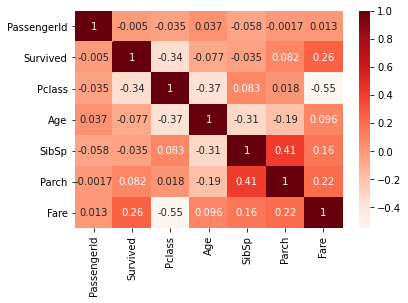

In [20]:
# Correlação e heatmap para as variáveis numéricas
correlation = train.corr()
sns.heatmap(correlation, cmap = 'Reds', annot = True)

In [21]:
# Análise descritiva das variáveis categóricas
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kirkland, Rev. Charles Leonard",male,1601,B96 B98,S
freq,1,577,7,4,644


Algumas considerações:

- O sexo masculino é o de maior frequência
- O porto na qual tiveram mais embarques foi o de Southamptom
- As variáveis Cabin e Embarked contém valores missing

## 4. Preparação dos Dados

### Juntando os dados de treino e de teste

In [22]:
# Salvando os índices dos datasets para recupreração posterior
train_id = train.shape[0]
test_id = test.shape[0]

# Salvando a coluna PassengerId para enviar ao kaggle
passengerId = test['PassengerId']

# Extraindo a variável target ('Survived') e excluindo ela do dataset de treino
target = train.Survived.copy()
train.drop(['Survived'], axis = 1, inplace = True)

# Concatenando os datasets de treino e teste para um únido DataFrame
df = pd.concat([train, test], axis = 0).reset_index(drop = True)

In [23]:
# Shape dos dados
df.shape

(1309, 11)

### Selecionando as features

De acordo com a análise exploratória realizada, vamos desconsiderar as variáveis PassegerId, Name, Ticket e Cabin, uma vez que não parecem serem relevantes para as previsões.

In [24]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [25]:
# Variáveis restantes
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

### Valores missing

In [26]:
df.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [27]:
# Porcentagem de dados faltantes
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

Age         20.091673
Embarked     0.152788
Fare         0.076394
Parch        0.000000
SibSp        0.000000
Sex          0.000000
Pclass       0.000000
dtype: float64

In [28]:
# Tratamento dos valores missing

# Age
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace = True)

# Fare
fare_median = df['Fare'].median()
df['Fare'].fillna(fare_median, inplace = True)

# Embarked
embarked_top = df['Embarked'].value_counts()[0]
df['Embarked'].fillna(embarked_top, inplace = True)

Para o tratamento das variáveis Age e Fare foi aplicado a mediana. Já para a variável Embarked, aplicou-se o valor com maior frequência.

### Feature Engineering

In [29]:
# Convertendo a variável 'Sex' em 0 (masculino) e 1 (feminino)
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [30]:
# Criando Dummy Variables para Embarked
embarked_dummy = pd.get_dummies(df['Embarked'], prefix = 'Embarked')
df = pd.concat([df, embarked_dummy], axis = 1)
df.drop('Embarked', axis = 1, inplace = True)

In [31]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


Nesta etapa do processo é preciso rrealizar a conversão das variáveis categóricas em numérica, para que os modelos consigam compreende-las. Para a variável Sex, foi aplicado o valor 0 para as pessoas masculinas e 1 para as femininas. Já para a variável Embarked, foi aplicado o conceito de variáveis dummy.

### Separando os dados de treino e teste

In [32]:
train = df.iloc[:train_id]
test = df.iloc[train_id:]

## 5. Modelagem e Avaliação

Agora estamos prontos para treinar o modelo e prever a solução necessária. Para isto, vamos utilizar algoritmos de Classificação e Regressão para que possamos investigar as relações existentes entre a variável target (Survived) e as outras features selecionadas. Essa categoria de Machine Learning chama-se Aprendizado Supervisionado, pois estamos treinando nosso modelo com um determinado conjunto de dados. Para avaliar a performance dos nossos modelos será utilizada a métrica da acurácia.

Modelos utilizados:

- Logistic Regression
- KNN - K-Neighbors
- SVM - Suport Vector Machine
- Decision Tree
- Random Forest

In [33]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Criando e treinando o modelo
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)

# Acurácia
acc_tree = round(decision_tree.score(train, target) * 100, 2)

print('Acurácia do modelo da Árvore de Decisão: {}'.format(acc_tree))

Acurácia do modelo da Árvore de Decisão: 97.98


In [34]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# Criando e treinando o modelo
log_reg = LogisticRegression()
log_reg.fit(train, target)

# Acurácia
acc_log_reg = round(log_reg.score(train, target) * 100, 2)

print('Acurácia do modelo de Regressão Logística: {}'.format(acc_log_reg))

Acurácia do modelo de Regressão Logística: 80.25


In [35]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# Criando e treinando o modelo
knn = KNeighborsClassifier()
knn.fit(train, target)

# Acurácia
acc_knn = round(knn.score(train, target) * 100, 2)

print('Acurácia do modelo KNN: {}'.format(acc_knn))

Acurácia do modelo KNN: 80.7


In [36]:
# SVM

from sklearn.svm import SVC

# Criando e treiando o modelo
svm = SVC()
svm.fit(train, target)

# Acurácia
acc_svm = round(svm.score(train, target) * 100, 2)

print('Acurácia do modelo SVM: {}'.format(acc_svm))

Acurácia do modelo SVM: 68.46


In [37]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# Criando e treinando o modelo
random_forest = RandomForestClassifier()
random_forest.fit(train, target)

# Acurácia
acc_random_forest = round(random_forest.score(train, target) * 100, 2)

print('Acurácia do modelo Random Forest: {}'.format(acc_random_forest))

Acurácia do modelo Random Forest: 97.98


In [38]:
# Rankind dos modelos

models = pd.DataFrame({'Model':['Logistic Regression', 'KNN','SVM', 'Decision Tree', 'Random Forest'],
                       'Score':[acc_log_reg, acc_knn, acc_svm, acc_tree, acc_random_forest]})

models.sort_values(by = 'Score', ascending = False).reset_index(drop = True)

,Model,Score
0,Decision Tree,97.98
1,Random Forest,97.98
2,KNN,80.70
3,Logistic Regression,80.25
4,SVM,68.46


## 6. Submission to Kaggle

In [ ]:
# Submission Random Forest

# Previsões
Y_pred = random_forest.predict(test)

# Dataframe submission
submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': Y_pred
})

# Arquivo csv
submission.to_csv('./submission_random_forest', index = False)

In [40]:
# Submission Decision Tree

# Previsões
Y_pred = decision_tree.predict(test)

# Dataframe submission
submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': Y_pred
})

# Arquivo csv
submission.to_csv('./submission_decision_tree', index = False)

In [41]:
# Submission Logistic Regression

# Previsões
Y_pred = log_reg.predict(test)

# Dataframe submission
submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': Y_pred
})

# Arquivo csv
submission.to_csv('./submission_log_reg', index = False)

In [42]:
# Submission KNN

# Previsões
Y_pred = knn.predict(test)

# Dataframe submission
submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': Y_pred
})

# Arquivo csv
submission.to_csv('./submission_knn', index = False)

In [43]:
# Submission SVM

# Previsões
Y_pred = svm.predict(test)

# Dataframe submission
submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': Y_pred
})

# Arquivo csv
submission.to_csv('./submission_svm', index = False)